# **Chapter 03. 신경망**

In [ ]:
# 한글깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 3.2.2 계단 함수 구현하기
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

**3.2.2의 코드의 문제점**  
인수 x는 실수(부동소수점)만 입력되고, 넘파이 배열을 인수로 넣을 수 없다.

In [ ]:
# 3.2.2 수정한 함수
def step_function(x):
    y = x > 0
    return y.astype(np.int) # 넘파이 배열의 자료형 변환

In [ ]:
# 수정한 함수 이해하기
x = np.array([-1.0, 1.0, 2.0])
print(x) # [-1.  1.  2.]
y = x > 0
print(y) # [False  True  True]

[-1.  1.  2.]
[False  True  True]


**수정한 함수 이해하기**  
넘파이 배열 x에 부등호 연산을 수행하면, 배열의 원소 각각에 부등호 연산을 수행한 bool 배열(y)이 생성된다.  
astype() 메소드를 이용해 배열 y의 원소를 bool에서 int형으로 바꿔준다.  
True는 1로, False는 0으로 변환된다

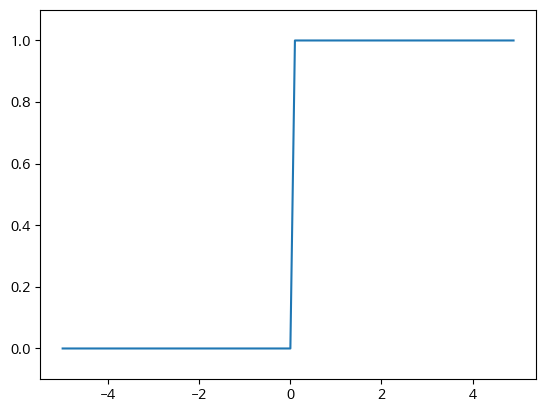

In [ ]:
# 3.2.3 계단 함수의 그래프
def step_function(x):
    return np.array(x > 0, dtype=np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.rcParams['axes.unicode_minus'] = False
plt.show()

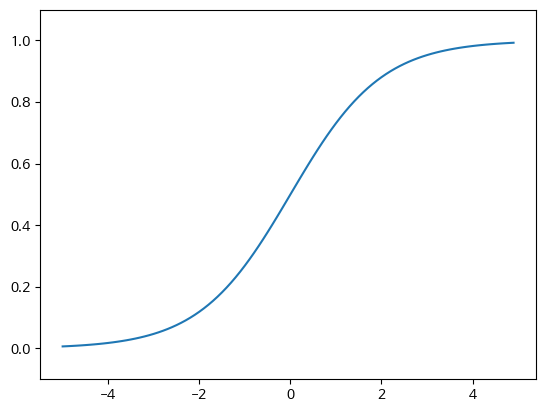

In [ ]:
# 3.2.4 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 브로드캐스트 기능으로 넘파이 배열 연산을 처리해준다.

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.rcParams['axes.unicode_minus'] = False
plt.show()

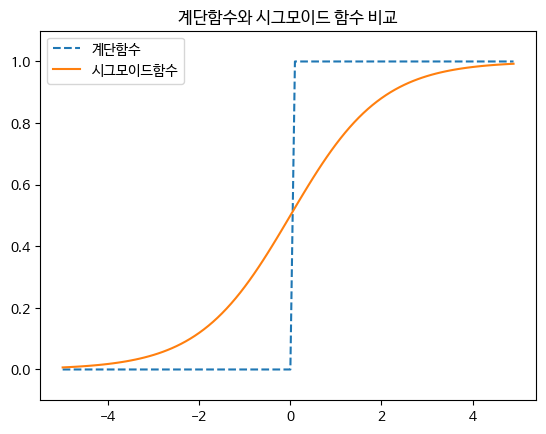

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

plt.plot(x, y1, label="계단함수", linestyle="--")
plt.plot(x, y2, label="시그모이드함수")
plt.ylim(-0.1, 1.1)
plt.title("계단함수와 시그모이드 함수 비교")
plt.legend()
plt.show()

**두 함수의 차이점**  
1. 계단 함수는 0을 경계로 출력이 갑자기 바뀌는 반면에  
2. 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다.  
3. 시그모이드 함수의 연속적인 특징이 신경망 학습에서 중요한 역할을 한다.  
  
**두 함수의 공통점**
1. 큰 관점에서 보면 두 함수는 같은 모양이다.  
2. 두 함수 모두 입력이 작을 때의 출력은 0에 가깝고(혹은 0이고), 입력이 커지면 출력이 1에 가까워지는(혹은 1이 되는) 구조이다.
3. 입력이 아무리 작거나 커도 출력은 0에서 1 사이라는 것을 알 수 있다.

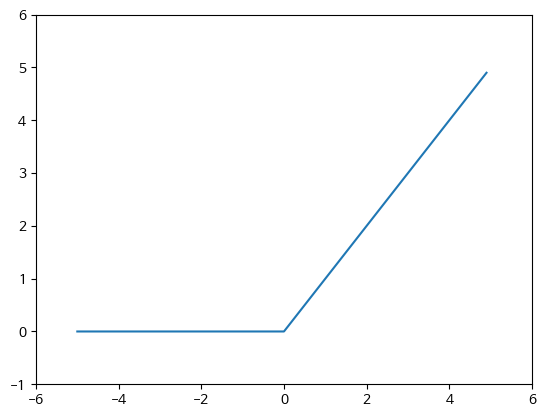

In [ ]:
# 3.2.7 ReLU 함수 구현하기
def relu(x):
    return np.maximum(0, x) # 두 입력 중 큰 값을 선택해 반환

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.xlim(-6.0, 6.0)
plt.ylim(-1.0, 6.0)
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [ ]:
# 3.3.1 다차원 배열
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A)) # 차원의 수
print(A.shape) # 배열의 형상, 튜플로 반환하는 것에 주의
print(A.shape[0])
print()

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B)) # 2차원 배열 = 행렬
print(B.shape) # (3, 2), 처음 차원(0번째 차원)에는 원소 3개 / 다음 차원(1번째 차원)에는 원소가 2개라는 의미

[1 2 3 4]
1
(4,)
4

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [ ]:
# 3.2.2 행렬의 곱
A = np.array([[1, 2], [3, 4]])
print("A 배열의 형상:", A.shape)
B = np.array([[5, 6], [7, 8]])
print("B 배열의 형상:", B.shape)
print(np.dot(A, B))
print()

# 내측에 있는 수가 같아야 곱셈 가능(열의 개수와 행의 개수가 맞지 않을 때) 오류 발생
# 2X2 와 2X3의 행렬의 곱
A = np.array([[1, 2, 3], [4, 5, 6]]) # (2, 3)
C = np.array([[1, 2], [3, 4]]) # (2, 2)
print((np.array([[1, 2], [4, 5], [6, 7]])).shape)
print(np.dot(A, C))

A 배열의 형상: (2, 2)
B 배열의 형상: (2, 2)
[[19 22]
 [43 50]]

(3, 2)


ValueError: ignored

In [ ]:
# 3.3.3 신경망에서의 행렬 곱
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
print(X.shape, W.shape)
print(W)
Y = np.dot(X, W)
print(Y)

(2,) (2, 3)
[[1 3 5]
 [2 4 6]]
[ 5 11 17]


## **3층 신경망 구현하기**

In [ ]:
# 입력층에서 1층으로의 신호 전달 구현
# 입력 신호, 가중치, 편향은 적당한 임의의 값으로 설정
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1) # 활성화 함수로 변환된 신호
print(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
# 1층에서 2층으로의 신호 전달 구현
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [ ]:
# 2층에서 출력층으로의 신호 전달 구현
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

In [ ]:
# 3층 신경망 구현 정리
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network() # 초기화
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층 설계하기

In [ ]:
# 3.5